In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pickle
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.manifold import TSNE
import os

In [4]:
def save_obj_curr_folder(obj, name):
    with open(name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj_curr_folder(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [34]:
all_pl_with_description = pickle.load(open('data_pl/mpd_pl_with_description.p', 'rb'))
pl_desc_path = '/media/irene/dataset/mpd.v1/data_pl_desc'
tr_info_path = '/media/irene/dataset/mpd.v1/tr_info'
track_features_to_investigate = ['popularity',
                            'acousticness',
                            'danceability',
                            'energy',
                            'instrumentalness',
                            'liveness',
                            'loudness',
                            'speechiness',
                            'tempo',
                            'valence',
                            'album_release_year']

In [19]:
def plot_kde(data, bw_values=[0.001, 0.0001]):
    kde = [scipy.stats.gaussian_kde(data, bw_method=bw) for bw in bw_values]
    # plt.hist(data, 50, normed=1, facecolor='green', alpha=0.5);

    t_range = np.linspace(-2,8,200)
    for i, bw in enumerate(bw_values):
        plt.plot(t_range,kde[i](t_range), lw=1, label='bw = '+str(bw))
    plt.xlim(-1,6)
    plt.legend(loc='best')

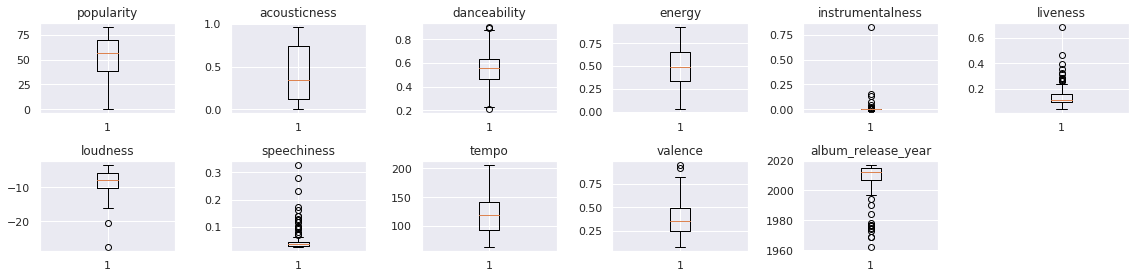

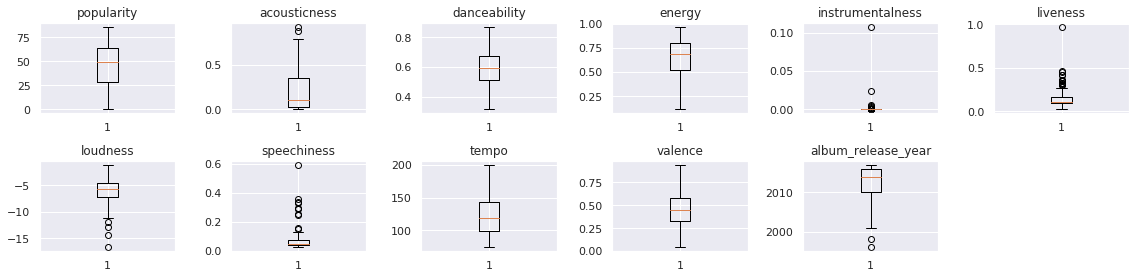

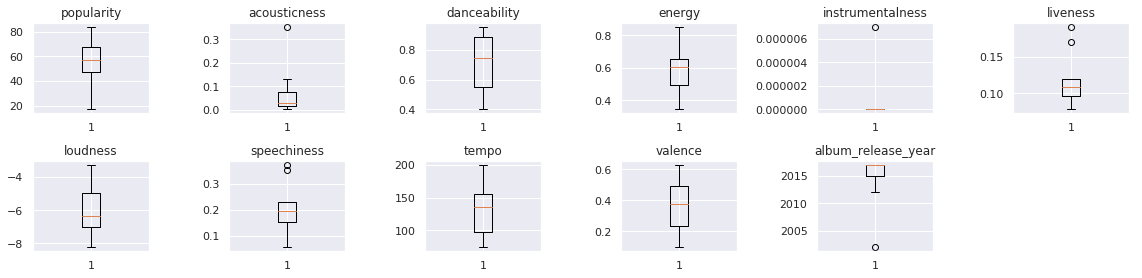

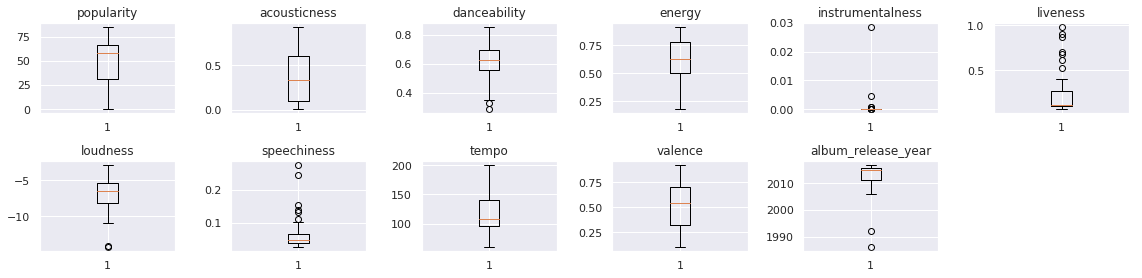

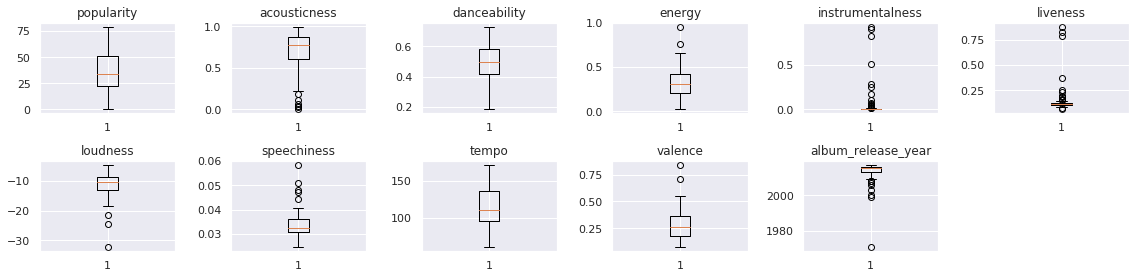

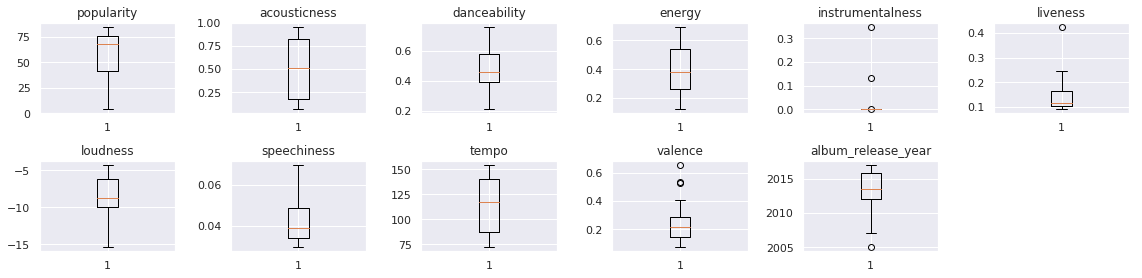

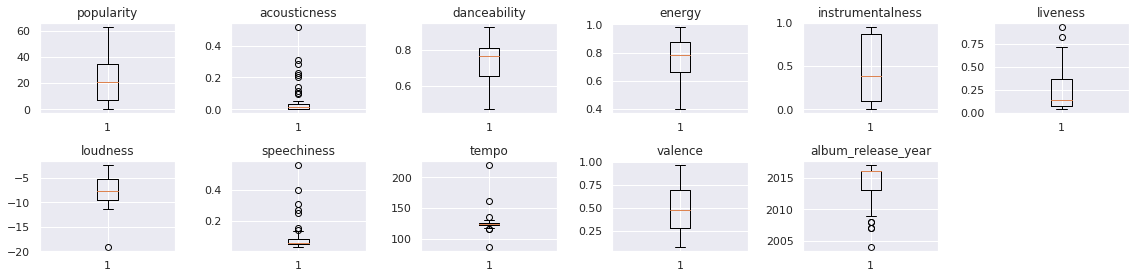

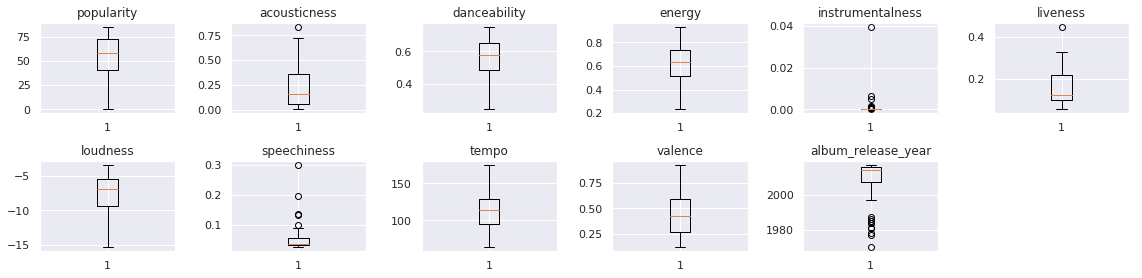

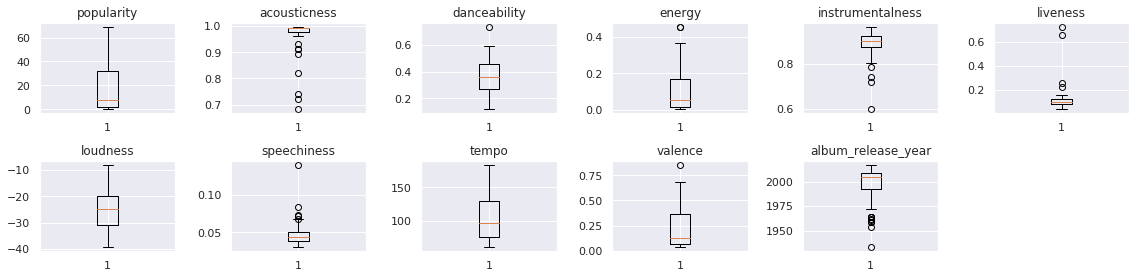

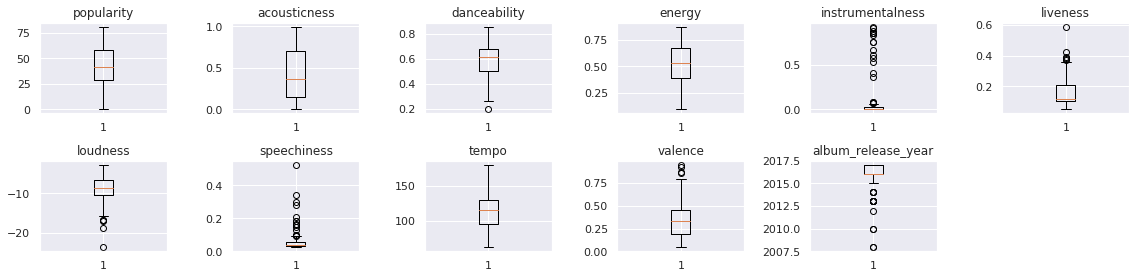

In [68]:
# for _idx in tqdm(range(len(all_pl_with_description))):
for _idx in range(0,5000,500):
    _pl = all_pl_with_description[_idx]
    _pl_feature = []

    _curr_track_list = _pl['tracks']
    _curr_pl_feature_list_dict = dict()

    for _tfidx in range(len(track_features_to_investigate)):
        _curr_pl_feature_list_dict[track_features_to_investigate[_tfidx]] = list()

    for _tr in _curr_track_list:
        _curr_track_id = _tr['track_uri'].split(':')[-1]
        _curr_track_path = os.path.join(tr_info_path, _curr_track_id + '.p')
        _curr_track_info = load_obj_curr_folder(_curr_track_path)

        # popularity
        if _curr_track_info['info'] is not None:
            _curr_pl_feature_list_dict[track_features_to_investigate[0]].append(
                _curr_track_info['info'][track_features_to_investigate[0]])
        else:
            print('info err : ' + _curr_track_path)
            continue

        # others
        if _curr_track_info['audio_feature'] is not None:
            for _tfidx in range(1, len(track_features_to_investigate) - 1):
                _curr_pl_feature_list_dict[track_features_to_investigate[_tfidx]].append(
                    _curr_track_info['audio_feature'][track_features_to_investigate[_tfidx]])
        else:
            print('audio_feature err : ' + _curr_track_path)
            continue

        if _curr_track_info['audio_feature'] is not None:

            _curr_pl_feature_list_dict[track_features_to_investigate[-1]].append(
                int(_curr_track_info['info']['album']['release_date'].split('-')[0]))
        else:
            print('audio_feature err : ' + _curr_track_path)
            continue
    
    fig = plt.figure(figsize=(16, 4))
    for _tfidx in range(len(track_features_to_investigate)):
        _tmp_arr = np.array(_curr_pl_feature_list_dict[track_features_to_investigate[_tfidx]])
        
        ax = fig.add_subplot(2,6,_tfidx+1)
        ax.boxplot(_tmp_arr)
#         ax.hist(_tmp_arr, normed=True, bins=30)
        ax.set_title(track_features_to_investigate[_tfidx])
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

#         kde = scipy.stats.gaussian_kde(_tmp_arr, bw_method=0.0001)
#         t_range = np.linspace(-2,8,200)
#         ax.plot(t_range, kde(t_range), lw=1, label='bw = 0.0001')
        